In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
batch_size = 32
img_height = 160
img_width = 160

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  # 입력 데이터 path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(#이미지 size),
  batch_size=#배치 사이즈)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  # 입력 데이터 path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(#이미지 size),
  batch_size=#배치 사이즈)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("# 가로 전환", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [8]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  #자유롭게 모델을 구성해 보세요
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs = 15
history = model.fit(
  #입력 데이터셋,
  validation_data=#검증 데이터셋,
  epochs=epochs
)

Epoch 1/15
50/50 [==============================] - 18s 69ms/step - loss: 0.7231 - accuracy: 0.4938 - val_loss: 0.6896 - val_accuracy: 0.4837
Epoch 2/15
50/50 [==============================] - 1s 17ms/step - loss: 0.6751 - accuracy: 0.5387 - val_loss: 0.6384 - val_accuracy: 0.6212
Epoch 3/15
50/50 [==============================] - 1s 17ms/step - loss: 0.6416 - accuracy: 0.6069 - val_loss: 0.6520 - val_accuracy: 0.6575
Epoch 4/15
50/50 [==============================] - 1s 16ms/step - loss: 0.6168 - accuracy: 0.6500 - val_loss: 0.6293 - val_accuracy: 0.6575
Epoch 5/15
50/50 [==============================] - 1s 17ms/step - loss: 0.6067 - accuracy: 0.6469 - val_loss: 0.6018 - val_accuracy: 0.6637
Epoch 6/15
50/50 [==============================] - 1s 17ms/step - loss: 0.5792 - accuracy: 0.6906 - val_loss: 0.5935 - val_accuracy: 0.7088
Epoch 7/15
50/50 [==============================] - 1s 16ms/step - loss: 0.5597 - accuracy: 0.6981 - val_loss: 0.5633 - val_accuracy: 0.7000
Epoch 8/15
5

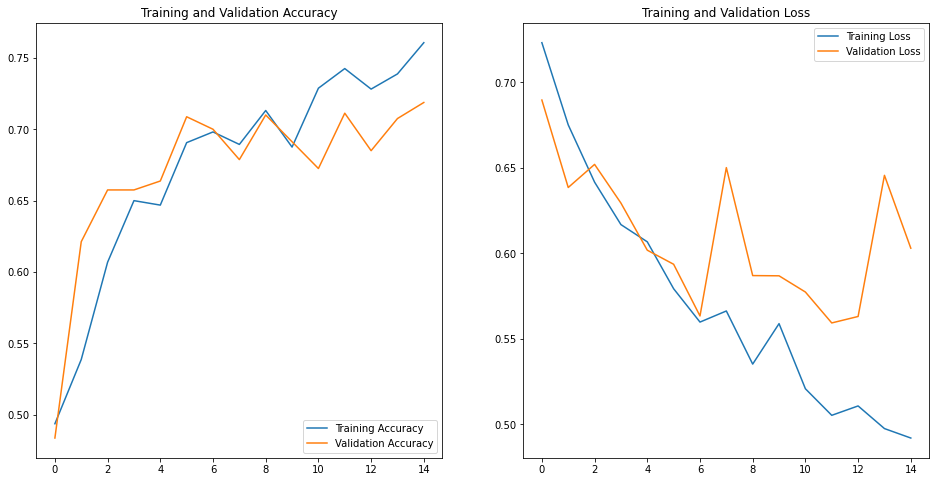

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()